In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

<center>
<img src="imgs/ETTI_intro.jpg"  alt="drawing" width="45%"/>
</center>

In [ ]:
#import sympy as sp

In [2]:
bonds_df1 =pd.DataFrame()
bonds_df1['Maturity'] = [1,2,3,4]
bonds_df1['Price'] = [1000, 995.49, 989.08, 982.63]
bonds_df1

,Maturity,Price
0,1,1000.00
1,2,995.49
2,3,989.08
3,4,982.63


In [19]:
rent = [0.05]
x = Symbol('x', real=True, positive=True)

eq = 50/(1+x) + 1050/(1+x)**2 -995.49
rent.append(solve(eq, x)[0].round(4))

eq = 50/(1+x) + 50/(1+x)**2 + 1050/(1+x)**3 - 989.08
rent.append(solve(eq, x)[0].round(4))

eq = 50/(1+x) + 50/(1+x)**2 + 50/(1+x)**3 + 1050/(1+x)**4 - 982.63
rent.append(solve(eq, x)[0].round(4))

bonds_df1['rent']=np.array(rent) * 100
bonds_df1

,Maturity,Price,rent,spots
0,1,1000.00,5.0,5.0
1,2,995.49,5.24,5.25
2,3,989.08,5.40,5.42
3,4,982.63,5.50,5.51


In [20]:
spots = [0.05]

eq = 50/(1+spots[0]) + 1050/(1+x)**2 -995.49
spots.append(solve(eq, x)[0].round(4))

eq = 50/(1+spots[0]) + 50/(1+spots[1])**2 + 1050/(1+x)**3 - 989.08
spots.append(solve(eq, x)[0].round(4))

eq = 50/(1+spots[0]) + 50/(1+spots[1])**2 + 50/(1+spots[2])**3 + 1050/(1+x)**4 - 982.63
spots.append(solve(eq, x)[0].round(4))

bonds_df1['spots']=(np.array(spots) * 100)
bonds_df1


,Maturity,Price,rent,spots
0,1,1000.00,5.0,5.0
1,2,995.49,5.24,5.25
2,3,989.08,5.40,5.42
3,4,982.63,5.50,5.51


In [4]:
bonds_df = pd.read_csv('data/Bonds.csv', sep=';')
bonds_df

,Bond,Price,Maturity,Coupon
0,A,96.60,1,2.0
1,B,93.71,2,2.5
2,C,91.56,3,3.0
3,D,90.24,4,3.5
4,E,89.74,5,4.0
5,F,90.04,6,4.5
6,G,91.09,7,5.0
7,H,92.82,8,5.5
8,I,95.19,9,6.0
9,J,98.14,10,6.5


In [57]:
maturity_max = bonds_df['Maturity'].max()

In [59]:
array

[[102.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.5, 102.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.0, 3.0, 103.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.5, 3.5, 3.5, 103.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4.0, 4.0, 4.0, 4.0, 104.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4.5, 4.5, 4.5, 4.5, 4.5, 104.5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 105.0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 105.5, 0, 0, 0, 0, 0, 0, 0],
 [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 106.0, 0, 0, 0, 0, 0, 0],
 [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 106.5, 0, 0, 0, 0, 0],
 [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 107.0, 0, 0, 0, 0],
 [7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 107.5, 0, 0, 0],
 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 108.0, 0, 0],
 [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 108.5, 0],
 [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 109.0]]

In [58]:
array = []
for i in bonds_df.iterrows(): 
    # [Cupón en € tantas veces como Maturity -1] + [100+Cupón] + [Tantos '0' como diferencia entre maturity del bono y max maturity]
    x = [i[1][3]]*(i[1][2]-1)+[(100+i[1][3])] + [0]*(maturity_max-i[1][2]) # Sumar listas las concatena
    array.append(x)

cash_flows_df = pd.DataFrame(np.array(array))
cash_flows_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,102.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.5,3.5,3.5,103.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,4.5,4.5,4.5,4.5,104.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,5.0,5.0,5.0,5.0,5.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.5,5.5,5.5,5.5,5.5,5.5,5.5,105.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,106.5,0.0,0.0,0.0,0.0,0.0


In [127]:
cash_flows_inv_df = np.linalg.inv(cash_flows_df)
disc_factor = cash_flows_inv_df @ bonds_df['Price']
disc_factor

array([0.94705882, 0.89114491, 0.83539212, 0.7814726 , 0.72999737,
       0.68140865, 0.63578693, 0.59296268, 0.55300618, 0.51574181,
       0.48086164, 0.44840695, 0.41809328, 0.38980333, 0.36348408])

In [136]:
etti_df = pd.DataFrame()
etti_df.index = bonds_df['Maturity']
etti_df['rates'] = (-100 * np.log(disc_factor)/bonds_df['Maturity'])
etti_df


,rates
Maturity,
1,5.762412
2,5.995135
3,6.164380
4,6.294287
5,6.393218
6,6.469883
7,6.532798
8,6.582068
9,6.621490


<AxesSubplot: xlabel='Maturity'>

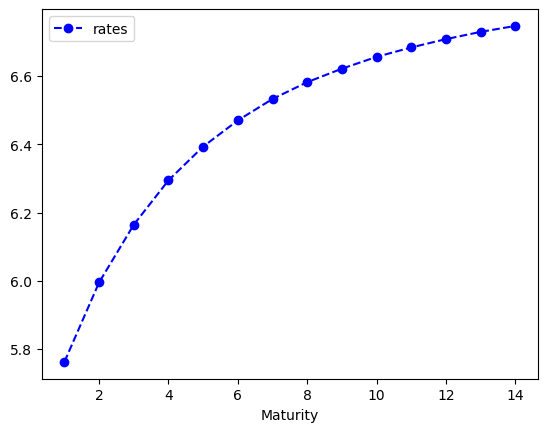

In [139]:
etti_df.plot(marker='o', linestyle='--', color='b')

In [2]:
bonds_df_mult = pd.read_csv('data/Bonds_mult.csv', sep=';')
bonds_df_mult

,Bond,Price,Maturity,Coupon
0,A,91.897,1,2.0
1,B,83.256,2,2.5
2,C,76.000,3,3.0
3,D,76.235,3,3.2
4,E,71.211,4,3.5
5,F,67.967,5,4.0
6,G,66.000,6,4.5
7,H,66.163,6,4.2
8,I,65.488,7,5.0
9,J,65.700,8,5.5


In [3]:
maturity_max_mult = bonds_df_mult['Maturity'].max()
maturity_max_mult

12

In [7]:
array_mult = []
for i in bonds_df_mult.iterrows(): 
    # [Cupón en € tantas veces como Maturity -1] + [100+Cupón] + [Tantos '0' como diferencia entre maturity del bono y max maturity]
    x = [i[1][3]]*(i[1][2]-1)+[(100+i[1][3])] + [0]*(maturity_max_mult-i[1][2]) # Sumar listas las concatena
    array_mult.append(x)

cash_flows_mult_df = pd.DataFrame(np.array(array_mult))
cash_flows_mult_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.5,102.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,3.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.2,3.2,103.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.5,3.5,3.5,103.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,4.0,4.0,4.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.5,4.5,4.5,4.5,4.5,104.5,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,4.2,4.2,4.2,4.2,104.2,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,5.0,5.0,5.0,5.0,5.0,105.0,0.0,0.0,0.0,0.0,0.0
9,5.5,5.5,5.5,5.5,5.5,5.5,5.5,105.5,0.0,0.0,0.0,0.0


In [12]:
disc_factor_mult = np.linalg.inv(cash_flows_mult_df.T @ cash_flows_mult_df) @ cash_flows_mult_df.T @ bonds_df_mult['Price']

0     0.900943
1     0.790271
2     0.687433
3     0.607586
4     0.538668
5     0.486323
6     0.432697
7     0.391089
8     0.347329
9     0.323134
10    0.294483
11    0.268710
dtype: float64

In [11]:
cash_flows_mult_df.T @ bonds_df_mult['Price']

0     14085.1376
1     13037.2436
2     19727.0036
3     11152.6516
4     10579.0131
5     16726.7451
6      9484.3605
7      9178.1205
8     15308.3705
9      8285.7745
10     8038.0310
11     7781.4950
dtype: float64

In [56]:
cash_flows_inv_df = np.linalg.inv(cash_flows_df)
disc_factor = cash_flows_inv_df @ bonds_df['Price']
disc_factor

[[102.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.5, 102.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.0, 3.0, 103.0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.5, 3.5, 3.5, 103.5, 0, 0, 0, 0, 0, 0, 0, 0],
 [4.0, 4.0, 4.0, 4.0, 104.0, 0, 0, 0, 0, 0, 0, 0],
 [4.5, 4.5, 4.5, 4.5, 4.5, 104.5, 0, 0, 0, 0, 0, 0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 105.0, 0, 0, 0, 0, 0],
 [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 105.5, 0, 0, 0, 0],
 [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 106.0, 0, 0, 0],
 [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 106.5, 0, 0],
 [7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 107.0, 0],
 [7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 107.5],
 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 108.0],
 [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 108.5],
 [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 109.0]]